In [2]:
import tempfile
import urllib.request
import zipfile
from pathlib import Path
from random import Random

import matplotlib.pyplot as plt
import numpy as np

In [3]:
random = Random(42)  # Para reproducibilidad; cambiar para obtener distintos resultados

# 1. Introducción al procesamiento de imágenes

## 1.1 Imágenes digitales y su representación

Una imagen digital es una representación bidimensional de una escena visual.
La imagen se representa como una matriz de **píxeles** (*picture elements*), 
donde cada píxel es un número que representa el color de la imagen en una
posición específica.

De manera más concreta cada píxel contiene la información necesaria para enceder
un punto en la pantalla con un color y luminosidad específicos.
Dado que las pantallas más comunes funcionan con matrices de focos de LED de
tres colores (rojo, verde y azul), la representación más común de un píxel es
mediante tres números que representan la intensidad de cada uno de estos diodos.

### La matriz como representación de una imagen

In [12]:
# Generando una imagen a partir de funciones matemáticas
ticks = np.linspace(-3, 3, 96)
ticks


array([-3.        , -2.93684211, -2.87368421, -2.81052632, -2.74736842,
       -2.68421053, -2.62105263, -2.55789474, -2.49473684, -2.43157895,
       -2.36842105, -2.30526316, -2.24210526, -2.17894737, -2.11578947,
       -2.05263158, -1.98947368, -1.92631579, -1.86315789, -1.8       ,
       -1.73684211, -1.67368421, -1.61052632, -1.54736842, -1.48421053,
       -1.42105263, -1.35789474, -1.29473684, -1.23157895, -1.16842105,
       -1.10526316, -1.04210526, -0.97894737, -0.91578947, -0.85263158,
       -0.78947368, -0.72631579, -0.66315789, -0.6       , -0.53684211,
       -0.47368421, -0.41052632, -0.34736842, -0.28421053, -0.22105263,
       -0.15789474, -0.09473684, -0.03157895,  0.03157895,  0.09473684,
        0.15789474,  0.22105263,  0.28421053,  0.34736842,  0.41052632,
        0.47368421,  0.53684211,  0.6       ,  0.66315789,  0.72631579,
        0.78947368,  0.85263158,  0.91578947,  0.97894737,  1.04210526,
        1.10526316,  1.16842105,  1.23157895,  1.29473684,  1.35

In [13]:
x, y = np.meshgrid(ticks, ticks)
print(x)
print(y)

[[-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 ...
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]
 [-3.         -2.93684211 -2.87368421 ...  2.87368421  2.93684211
   3.        ]]
[[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.93684211 -2.93684211 -2.93684211 ... -2.93684211 -2.93684211
  -2.93684211]
 [-2.87368421 -2.87368421 -2.87368421 ... -2.87368421 -2.87368421
  -2.87368421]
 ...
 [ 2.87368421  2.87368421  2.87368421 ...  2.87368421  2.87368421
   2.87368421]
 [ 2.93684211  2.93684211  2.93684211 ...  2.93684211  2.93684211
   2.93684211]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]


In [14]:
x*y

array([[ 9.        ,  8.81052632,  8.62105263, ..., -8.62105263,
        -8.81052632, -9.        ],
       [ 8.81052632,  8.62504155,  8.43955679, ..., -8.43955679,
        -8.62504155, -8.81052632],
       [ 8.62105263,  8.43955679,  8.25806094, ..., -8.25806094,
        -8.43955679, -8.62105263],
       ...,
       [-8.62105263, -8.43955679, -8.25806094, ...,  8.25806094,
         8.43955679,  8.62105263],
       [-8.81052632, -8.62504155, -8.43955679, ...,  8.43955679,
         8.62504155,  8.81052632],
       [-9.        , -8.81052632, -8.62105263, ...,  8.62105263,
         8.81052632,  9.        ]])

In [15]:
z = (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2) - y**2)
z

array([[-4.07401958e-06, -5.38469190e-06, -7.05339575e-06, ...,
         5.39027911e-06,  4.23244631e-06,  3.28206063e-06],
       [-5.89042094e-06, -7.78052792e-06, -1.01845115e-05, ...,
         7.92017626e-06,  6.21174420e-06,  4.81216790e-06],
       [-8.45090521e-06, -1.11557585e-05, -1.45925999e-05, ...,
         1.15391621e-05,  9.04026634e-06,  6.99688971e-06],
       ...,
       [-6.93292369e-06, -8.94720019e-06, -1.14048332e-05, ...,
         1.47269288e-05,  1.12488247e-05,  8.51487124e-06],
       [-4.76785076e-06, -6.14726582e-06, -7.82711011e-06, ...,
         1.02775777e-05,  7.84500630e-06,  5.93473808e-06],
       [-3.25160068e-06, -4.18812917e-06, -5.32631308e-06, ...,
         7.11736177e-06,  5.42900904e-06,  4.10447954e-06]])

In [16]:
print(f"z es una matriz de {z.shape} elementos de tipo {z.dtype}")
print(
    f"z tiene valores {z.mean():.3} ± {z.std():.3} "
    f"en el rango [{z.min():.3}, {z.max():.3}]"
)
print("Paletas disponibles:", plt.colormaps())

z es una matriz de (96, 96) elementos de tipo float64
z tiene valores 0.0855 ± 0.278 en el rango [-0.685, 1.06]
Paletas disponibles: ['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays'

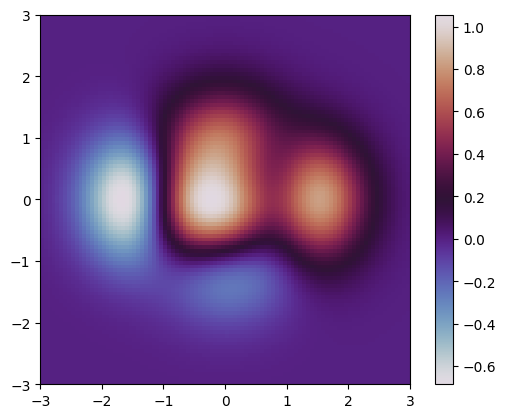

In [68]:
fig, ax = plt.subplots()
im = ax.imshow(z, cmap='twilight', origin='lower', extent=[-3, 3, -3, 3])
fig.colorbar(im, ax=ax)

Esta gráfica de función ya tiene una representación como imagen digital, sin
embargo, las imágenes digitales suelen tener valores enteros entre 0 y 255.
En nuestro caso, la imagen tiene un único valor de intensidad para cada píxel,
por lo que es una imagen en escala de grises.

In [31]:
cmap(1.0)

(0.987053, 0.991438, 0.749504, 1.0)

In [69]:
# Obtener un mapa de colores "magma"
cmap = plt.get_cmap('magma')
print(type(cmap))

# Observamos unos cuantos valores de colores:
colores = cmap([0, 0.25, 0.5, 0.75, 1])
print("Los colores que produce el mapa 'magma' están en el espacio RGBA de 0 a 1:")
print(colores)

<class 'matplotlib.colors.ListedColormap'>
Los colores que produce el mapa 'magma' están en el espacio RGBA de 0 a 1:
[[1.46200e-03 4.66000e-04 1.38660e-02 1.00000e+00]
 [3.16654e-01 7.16900e-02 4.85380e-01 1.00000e+00]
 [7.16387e-01 2.14982e-01 4.75290e-01 1.00000e+00]
 [9.86700e-01 5.35582e-01 3.82210e-01 1.00000e+00]
 [9.87053e-01 9.91438e-01 7.49504e-01 1.00000e+00]]


In [70]:
max_z = z.max()
print(f"El valor máximo de z es {max_z}")
min_z = z.min()
print(f"El valor mínimo de z es {min_z}")


El valor máximo de z es 1.0560394502327253
El valor mínimo de z es -0.68540810344194


In [71]:
# Normalizamos z
z_norm = (z - min_z) / (max_z - min_z)
print(f"z_norm tiene valores {z_norm.mean():.3} ± {z_norm.std():.3} en el rango [0, 1]")
print(f"El valor máximo de z_norm es {z_norm.max()}")
print(f"El valor mínimo de z_norm es {z_norm.min()}")

z_norm tiene valores 0.443 ± 0.16 en el rango [0, 1]
El valor máximo de z_norm es 1.0
El valor mínimo de z_norm es 0.0


In [72]:
# Aplicar el mapa de colores a la matriz z normalizada
z_color = cmap(z_norm)[:,:,:3]
print(f"z_color es una matriz de {z_color.shape} elementos de tipo {z_color.dtype}")
z_color[0, 0]

z_color es una matriz de (96, 96, 3) elementos de tipo float64


array([0.537755, 0.156894, 0.506551])

In [73]:
# Renormalizar la matriz z para que sus valores estén entre 0 y 255 (enteros de 8 bits)
z_color = (z_color * 255 + 0.5).astype(np.uint8)
print(f"z_color es una matriz de {z_color.shape} elementos de tipo {z_color.dtype}")

z_color es una matriz de (96, 96, 3) elementos de tipo uint8


(-0.5, 95.5, -0.5, 95.5)

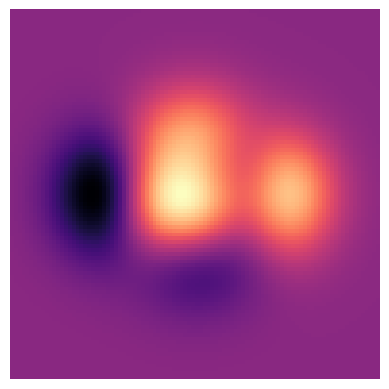

In [76]:
fig, ax = plt.subplots()
ax.imshow(z_color, origin='lower')

# Ocultar los ejes
ax.axis('off')

### Bases de datos de imágenes

El Instituto de Procesamiento de Señales e Imágenes de la Universidad California
del Sur (**USC-SIPI**)  ha creado una base de datos de imágenes digitales que
puede ser utilizada para propósitos de investigación y educación.
Se puede acceder a la base de datos en el siguiente enlace:
https://sipi.usc.edu/database/

In [78]:
def descargar_sipi(volumen: str, destino: Path = Path("sipi")) -> None:
    """Descarga un volumen de la base de datos miscelánea de la USC-SIPI."""
    url = f"https://sipi.usc.edu/database/{volumen}.zip"
    assert volumen in ["textures", "aerials", "misc", "sequences"]
    
    if (destino / volumen).exists():
        print(f"El volumen {volumen} ya existe en el directorio sipi.")
        return
    
    with tempfile.TemporaryFile() as temp:
        # Usamos un archivo temporal para la descarga
        print(f"Descargando {url}...")
        with urllib.request.urlopen(url) as response:
            temp.write(response.read())

        temp.seek(0)  # Reiniciar el puntero del archivo para leerlo
        
        with zipfile.ZipFile(temp) as z:
            print(f"Descomprimiendo {volumen}.zip...")
            z.extractall(destino)
    
    print(f"Volumen {volumen} descargado y descomprimido en {destino}.")

# Descargamos la base de datos miscelánea de la USC-SIPI
descargar_sipi("misc")

Descargando https://sipi.usc.edu/database/misc.zip...


Descomprimiendo misc.zip...
Volumen misc descargado y descomprimido en sipi.


In [80]:
archivos = list(Path("sipi/misc").iterdir())
print(f"Hay {len(archivos)} imágenes en la base de datos miscelánea.")

Hay 39 imágenes en la base de datos miscelánea.


Mostrando 5.2.08.tiff...
La imagen es un arreglo de tipo uint8 y de forma (512, 512).
En promedio, sus valores son 123.18 ± 40.06 en el rango [0, 255].
La imagen es en escala de grises.


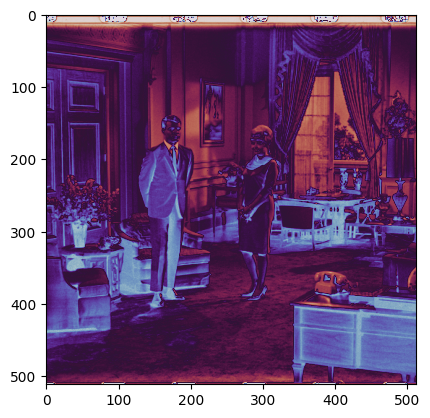

In [103]:
archivo_imagen = random.choice(archivos)
print(f"Mostrando {archivo_imagen.name}...")
imagen = plt.imread(archivo_imagen)  # Aquí se lee la imagen
print(f"La imagen es un arreglo de tipo {imagen.dtype} y de forma {imagen.shape}.")
print(
    f"En promedio, sus valores son {imagen.mean():.2f} ± {imagen.std():.2f} "
    f"en el rango [{imagen.min()}, {imagen.max()}]."
)

# Determinar si la imagen es a color o en escala de grises
a_color = imagen.ndim == 3
if a_color:
    print(f"La imagen es a color.")
else:
    print(f"La imagen es en escala de grises.")

# Mostrar la imagen
fig, ax = plt.subplots()
if a_color:
    img = ax.imshow(imagen)
else:
    img = ax.imshow(imagen, cmap="twilight")

## 2. Uso de Scikit-Image

Scikit-Image es una biblioteca de Python que provee una colección de algoritmos
para el procesamiento de imágenes.
Es parte del ecosistema de Scipy y es de código abierto.

In [104]:
import skimage as ski

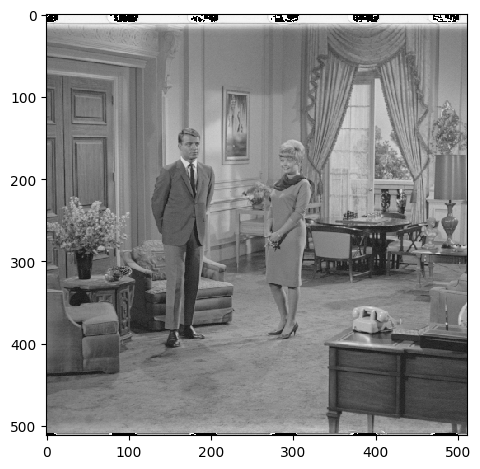

In [105]:
sipi_dir = Path("sipi")
archivo_imagen = sipi_dir / "misc" / "5.2.08.tiff"

# Cargar y mostrar una imagen con Scikit-Image
img = ski.io.imread(archivo_imagen)
ski.io.imshow(img)

Scikit-Image también cuenta con su propia base de datos de imágenes que se puede
acceder desde 

### Uso de índices de NumPy para manipular imágenes

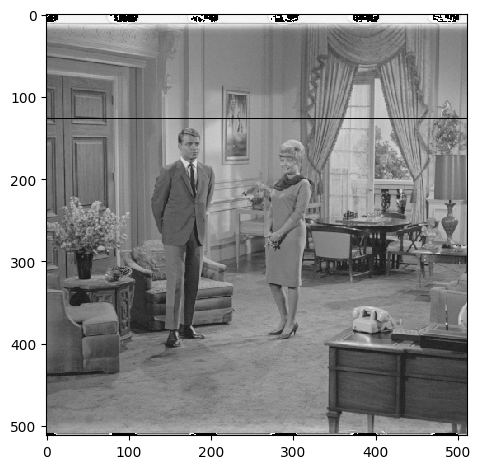

In [106]:
img[128, :]  = 0   # Cambiar la fila 128 a negro
ski.io.imshow(img)

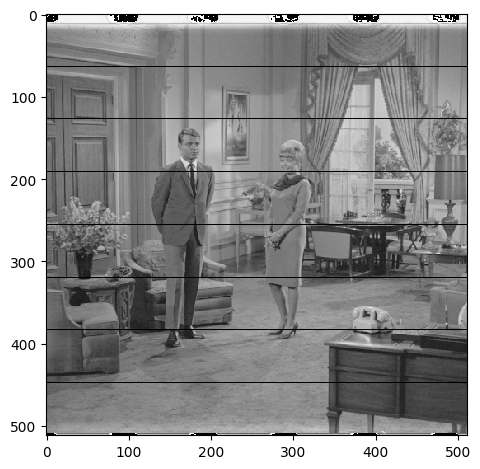

In [26]:
n_renglones = img.shape[0]
img[np.arange(n_renglones) % 64 == 0, :] = 0
ski.io.imshow(img)

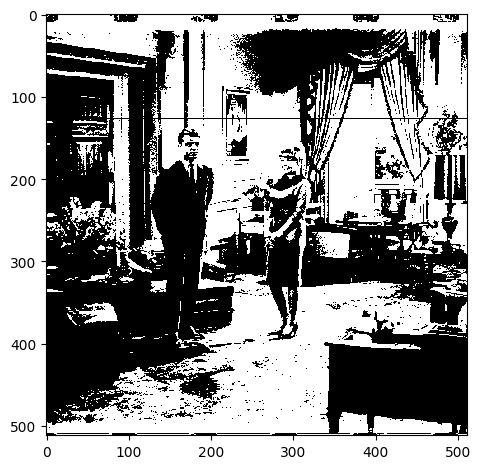

In [110]:
mascara = img > 128
ski.io.imshow(mascara)

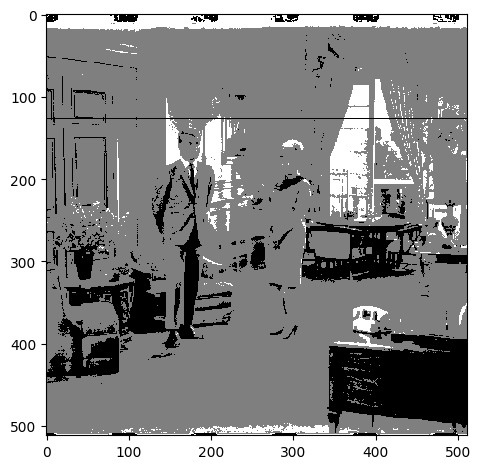

In [111]:
img[img < 85] = 0
img[(img >= 85) & (img <= 170)] = 127
img[img > 170] = 255
ski.io.imshow(img)